# semi_project
### <Covid19 - Tiredness>


### csv 파일 불러오기

### 서울특별시 일별 승하차 총 승객수 시각화
1. 서울시 지하철역만 골라서 (for/if)
2. 일별 총 승하차승객수를 구하고
3. x = 일별, y = 총승객수 그래프로 시각화

In [2]:
# csv 파일 불러오기

import pandas as pd

file_path = './semi_data/CARD_SUBWAY_MONTH_202002.csv'
subData = pd.read_csv(file_path, encoding = 'CP949')
print(subData.head())

       사용일자  노선명    역명   승차총승객수   하차총승객수      등록일자
0  20200201  1호선    시청  13966.0  14315.0  20200204
1  20200201  1호선    종각  24014.0  23628.0  20200204
2  20200201  1호선  종로3가  25613.0  24969.0  20200204
3  20200201  1호선  종로5가  19922.0  19765.0  20200204
4  20200201  1호선   동대문  11346.0  11210.0  20200204


In [3]:
print(subData.info)

<bound method DataFrame.info of            사용일자  노선명         역명   승차총승객수   하차총승객수      등록일자
0      20200201  1호선         시청  13966.0  14315.0  20200204
1      20200201  1호선         종각  24014.0  23628.0  20200204
2      20200201  1호선       종로3가  25613.0  24969.0  20200204
3      20200201  1호선       종로5가  19922.0  19765.0  20200204
4      20200201  1호선        동대문  11346.0  11210.0  20200204
...         ...  ...        ...      ...      ...       ...
17113  20200229  5호선        신금호   2661.0   2615.0  20200303
17114  20200229  5호선         행당   3217.0   2744.0  20200303
17115  20200229  5호선  왕십리(성동구청)   2175.0   2623.0  20200303
17116  20200229  5호선         마장   2531.0   2415.0  20200303
17117  20200229  5호선        답십리   6961.0   6437.0  20200303

[17118 rows x 6 columns]>


In [86]:
# '사용일자'로 그룹화
# groupby를 사용하면 기본으로 그룹라벨이 index가 됨 
# index를 사용하고 싶지 않은 경우 as_index = False 사용

# 새로운 컬럼
subData['승하차총승객수'] = subData['승차총승객수'] + subData['하차총승객수']
print(subData.head())

# 그룹별 집계하는 방법
subDay = subData.groupby(['사용일자'], as_index = False)['승하차총승객수'].sum()
print(subDay.head())
subDay.info() # 사용일자 타입이 int64 

# 사용일자 타입 날짜로 변환(int64 -> datetime)
subDay['사용일자'] = pd.to_datetime(subDay['사용일자'].astype('str'),errors = 'coerce')
subDay.info()
print(subDay['승하차총승객수'].max())

       사용일자  노선명    역명   승차총승객수   하차총승객수      등록일자  승하차총승객수
0  20200201  1호선    시청  13966.0  14315.0  20200204  28281.0
1  20200201  1호선    종각  24014.0  23628.0  20200204  47642.0
2  20200201  1호선  종로3가  25613.0  24969.0  20200204  50582.0
3  20200201  1호선  종로5가  19922.0  19765.0  20200204  39687.0
4  20200201  1호선   동대문  11346.0  11210.0  20200204  22556.0
       사용일자     승하차총승객수
0  20200201   9802719.0
1  20200202   7006847.0
2  20200203  13994343.0
3  20200204  14141705.0
4  20200205  13785128.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   사용일자     29 non-null     int64  
 1   승하차총승객수  29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 696.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----     

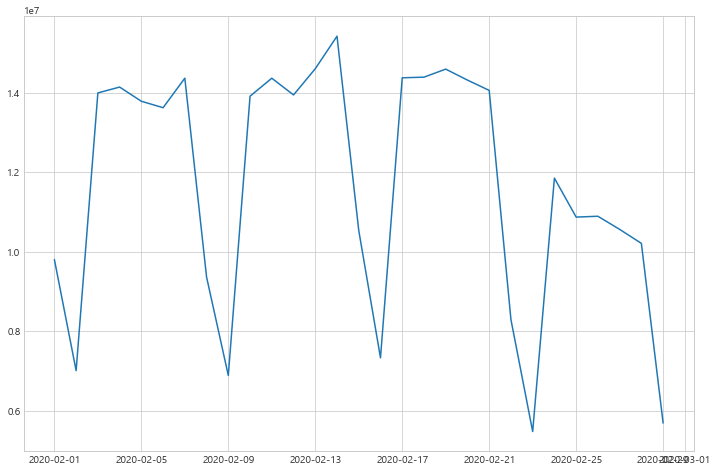

In [65]:
# 시각화하기

import numpy as np
import matplotlib.pyplot as plt

plt.plot(subDay['사용일자'], subDay['승하차총승객수'])
plt.show()

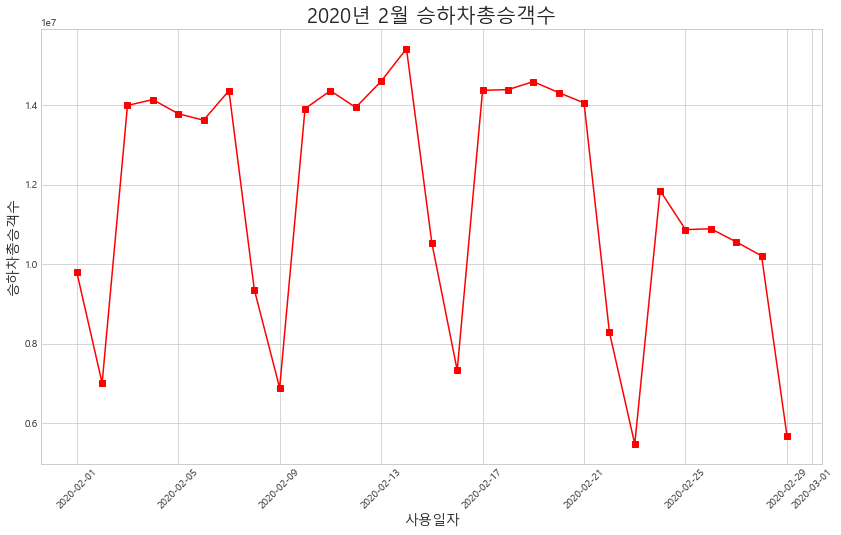

In [79]:
# 시각화하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
 
fig = plt.figure(figsize=(14,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(subDay['사용일자'],subDay['승하차총승객수'], marker='s', color='r') ## 선그래프 생성
plt.ylabel('승하차총승객수', fontsize=14)
plt.xlabel('사용일자', fontsize=14)
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('2020년 2월 승하차총승객수',fontsize=20) ## 타이틀 설정
plt.show()

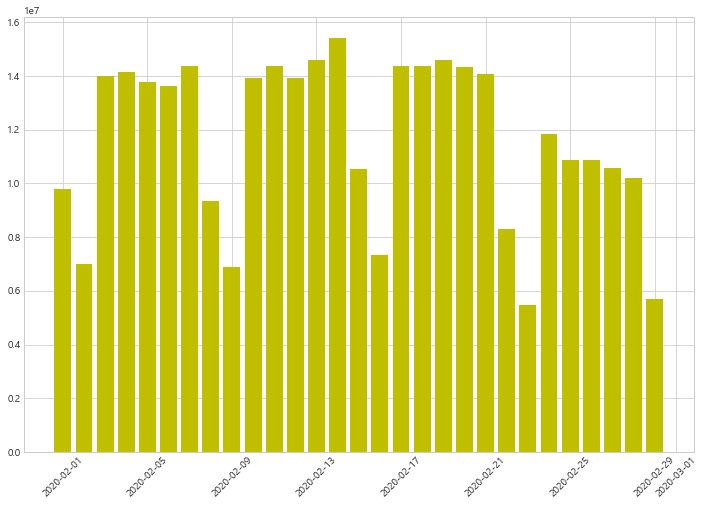

In [84]:
# 막대그래프 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

plt.figure()
plt.bar(subDay['사용일자'],subDay['승하차총승객수'],color='y')
plt.xticks(rotation=45)
plt.show()

### 서울시에 있는 역만 뽑아서 다시 